In [2]:
# import data

from finlab.data import Data

data = Data()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
import pickle
import warnings 
warnings.filterwarnings('ignore') 

In [3]:
twii = data.get('發行量加權股價指數')['台股指數']
bki = data.get('金融保險類指數')['台股指數']
semi = data.get('半導體類指數')['台股指數']
ntw =data.get('通信網路類指數')['台股指數']


twii = twii[twii.index.second == 0]
bki = bki[bki.index.second == 0]
semi = semi[semi.index.second == 0]
ntw = ntw[ntw.index.second == 0]

twii = twii['2010':'2021']
bki = bki['2010':'2021']
semi = semi['2010':'2021']
ntw = ntw['2010':'2021']
twii

date
2010-01-04 09:00:00     8188.11
2010-01-04 09:01:00     8222.42
2010-01-04 09:02:00     8223.38
2010-01-04 09:03:00     8221.49
2010-01-04 09:04:00     8220.30
                         ...   
2021-04-20 13:26:00    17284.22
2021-04-20 13:27:00    17284.22
2021-04-20 13:28:00    17284.22
2021-04-20 13:29:00    17284.22
2021-04-20 13:30:00    17323.87
Name: 台股指數, Length: 752296, dtype: float64

In [3]:
# daily_price

twii_daily = twii.groupby([twii.index.date]).mean()
bki_daily = bki.groupby([bki.index.date]).mean()
semi_daily = semi.groupby([semi.index.date]).mean()
ntw_daily = ntw.groupby([ntw.index.date]).mean()

df = pd.DataFrame([twii_daily, bki_daily, semi_daily, ntw_daily], index=('twii', 'bki', 'semi', 'ntw')).T
df
# len(semi_daily)

,twii,bki,semi,ntw
2010-01-04,8203.591550,907.678118,85.675535,108.875904
2010-01-05,8223.709779,911.999742,85.492620,108.993875
2010-01-06,8276.708708,918.174096,85.544354,109.244096
2010-01-07,8308.322066,925.612140,86.588561,107.396937
2010-01-08,8257.818635,924.499336,85.053026,106.624908
...,...,...,...,...
2021-04-14,16766.665240,1407.155129,412.581550,130.014244
2021-04-15,16960.114391,1423.559373,417.380295,130.481771
2021-04-16,17071.852177,1431.620074,416.797675,131.444465
2021-04-19,17235.244022,1466.965424,414.592657,131.699889


In [ ]:
# Testing for Granger Causality(相關性分析)

In [ ]:
"""
Step 1: Test each of the time-series to determine their order of integration. 
Ideally, this should involve using a test (such as the ADF test) for which the null hypothesis is non-stationarity; as well as a test (such as the KPSS test) for which the null is stationarity. 
It’s good to have a cross-check
"""

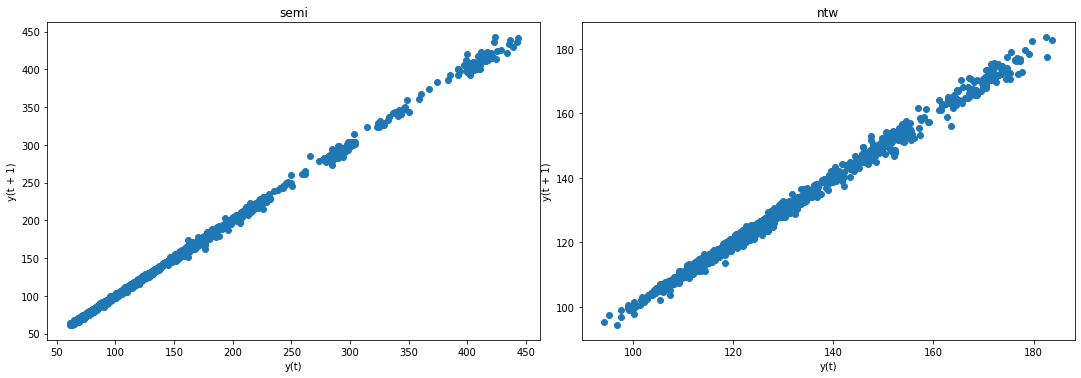

In [4]:
# lag_plot

from pandas.plotting import lag_plot

f2, (ax4, ax5) = plt.subplots(1, 2, figsize=(15, 5))
f2.tight_layout()

lag_plot(df['semi'], ax=ax4)
ax4.set_title('semi');

lag_plot(df['ntw'], ax=ax5)
ax5.set_title('ntw');

plt.show()

# f2, (ax4, ax5, ax6, ax7) = plt.subplots(1, 2, figsize=(15, 5))
# f2.tight_layout()


# lag_plot(df['twii'], ax=ax4)
# ax4.set_title('twii');

# lag_plot(df['bki'], ax=ax5)
# ax5.set_title('bki');

# lag_plot(df['semi'], ax=ax6)
# ax6.set_title('semi');

# lag_plot(df['ntw'], ax=ax7)
# ax7.set_title('ntw');

# plt.show()

In [5]:
# from non-stationary to stationary 

# difference operation for stationary
rawData = df.copy(deep=True)

# When deep=True (default), a new object will be created with a copy of the calling object’s data and indices. 
# Modifications to the data or indices of the copy will not be reflected in the original object (see notes below).

df['twii'] = df['twii'].diff()
df['bki'] = df['bki'].diff()
df['semi'] = df['semi'].diff()
df['ntw'] = df['ntw'].diff()
df = df.dropna()

df

,twii,bki,semi,ntw
2010-01-05,20.118229,4.321624,-0.182915,0.117970
2010-01-06,52.998930,6.174354,0.051734,0.250221
2010-01-07,31.613358,7.438044,1.044207,-1.847159
2010-01-08,-50.503432,-1.112804,-1.535535,-0.772030
2010-01-11,74.877380,3.542251,0.880295,0.460554
...,...,...,...,...
2021-04-14,-190.917601,-7.485351,-5.115055,-0.241808
2021-04-15,193.449151,16.404244,4.798745,0.467528
2021-04-16,111.737786,8.060701,-0.582620,0.962694
2021-04-19,163.391845,35.345351,-2.205018,0.255424


In [71]:
# split data into train and test. We will need this later for VAR analysis

msk = np.random.rand(len(df)) < 0.8 # rand函数根据给定维度生成[0,1)之间的数据
# len(df) # 3770
# msk # array([ True,  True,  True, ...,  True,  True,  True])

nobs = 4

train = df[0:-nobs] # 全部資料拿來訓練
test = df[-nobs:] # 用兩成資料做測試
train
# Check size
# train.shape # (2765, 4)
# test.shape # (10, 4)

,twii,bki,semi,ntw
2010-01-05,20.118229,4.321624,-0.182915,0.117970
2010-01-06,52.998930,6.174354,0.051734,0.250221
2010-01-07,31.613358,7.438044,1.044207,-1.847159
2010-01-08,-50.503432,-1.112804,-1.535535,-0.772030
2010-01-11,74.877380,3.542251,0.880295,0.460554
...,...,...,...,...
2021-04-08,91.259225,-2.320369,1.202694,0.103173
2021-04-09,27.925387,-5.120148,1.821513,-0.020111
2021-04-12,2.197860,18.888782,-4.418229,-0.204465
2021-04-13,69.089594,10.742214,1.160849,0.275498


In [7]:
# ADF Null hypothesis
# there is a unit root, meaning series is non-stationary

from statsmodels.tsa.stattools import adfuller

x1 = np.array(df['twii'])
x1 = x1[~np.isnan(x1)]

print('Result of ADF: ')
adftest = adfuller(x1)
adfoutput = pd.Series(adftest[0:4], index=['test statistis','p-value','lags used','numbers of observation'])
for key, value in adftest[4].items():
    adfoutput['critical value (%s)'%key] = '{0:f}'.format(value)
    
print(adfoutput)
print()


x2 = np.array(df['bki'])
x2 = x2[~np.isnan(x2)]

print('Result of ADF: ')
adftest = adfuller(x2)
adfoutput = pd.Series(adftest[0:4], index=['test statistis','p-value','lags used','numbers of observation'])
for key, value in adftest[4].items():
    adfoutput['critical value (%s)'%key] = '{0:f}'.format(value)
    
print(adfoutput)


x3 = np.array(df['semi'])
x3 = x3[~np.isnan(x3)]

print('Result of ADF: ')
adftest = adfuller(x3)
adfoutput = pd.Series(adftest[0:4], index=['test statistis','p-value','lags used','numbers of observation'])
for key, value in adftest[4].items():
    adfoutput['critical value (%s)'%key] = '{0:f}'.format(value)
    
print(adfoutput)
print()

x4 = np.array(df['ntw'])
x4 = x4[~np.isnan(x4)]

print('Result of ADF: ')
adftest = adfuller(x4)
adfoutput = pd.Series(adftest[0:4], index=['test statistis','p-value','lags used','numbers of observation'])
for key, value in adftest[4].items():
    adfoutput['critical value (%s)'%key] = '{0:f}'.format(value)
    
print(adfoutput)

Result of ADF: 
test statistis           -21.758215
p-value                         0.0
lags used                       5.0
numbers of observation       2769.0
critical value (1%)       -3.432714
critical value (5%)       -2.862584
critical value (10%)      -2.567326
dtype: object

Result of ADF: 
test statistis           -45.190809
p-value                         0.0
lags used                       0.0
numbers of observation       2774.0
critical value (1%)       -3.432710
critical value (5%)       -2.862582
critical value (10%)      -2.567325
dtype: object
Result of ADF: 
test statistis           -10.299163
p-value                         0.0
lags used                      24.0
numbers of observation       2750.0
critical value (1%)       -3.432730
critical value (5%)       -2.862592
critical value (10%)      -2.567330
dtype: object

Result of ADF: 
test statistis           -11.304773
p-value                         0.0
lags used                      18.0
numbers of observation      

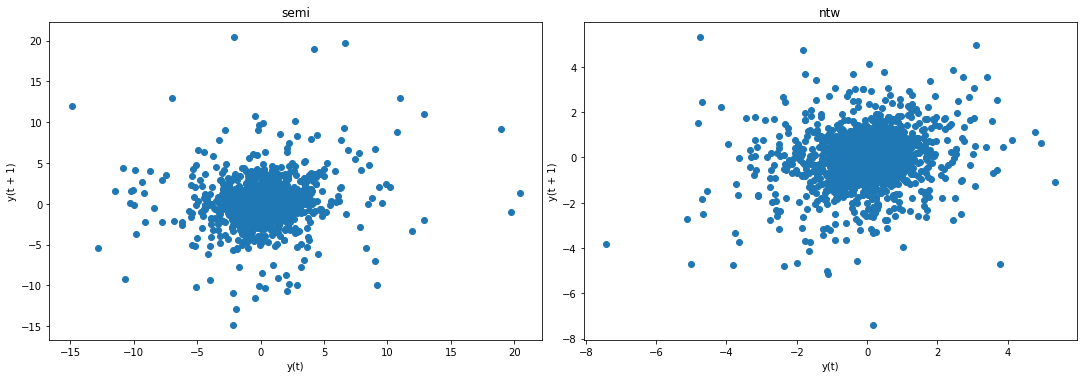

In [10]:
# lag plot is in confirmatory with ADF test

f2, (ax4, ax5) = plt.subplots(1, 2, figsize=(15, 5))
f2.tight_layout()

lag_plot(df['semi'], ax=ax4)
ax4.set_title('semi');

lag_plot(df['ntw'], ax=ax5)
ax5.set_title('ntw');

plt.show()

# Result: lag plot is in confirmatory with ADF test 

In [ ]:
"""
Step 2: 確認最大的差分變化次數(maximum order of integration)
Let the maximum order of integration for the group of time-series be m. 
So, if there are two time-series and one is found to be I(1) and the other is I(2), then m = 2. 
If one is I(0) and the other is I(1), then m = 1, etc.
"""
# We saw above that for our case m = 1 

In [ ]:
"""
Step 3: 設定向量自迴歸模型(Vector Autoregression model, VAR model)
Set up a VAR model in the levels of the data, 
regardless of the orders of integration of the various time-series. 
Most importantly, you must not difference the data, no matter what you found at Step 1.
"""

In [ ]:
"""
Step 4: 決定最適落遲項
Determine the appropriate maximum lag length for the variables in the VAR, say p, using the usual methods. 
Specifically, base the choice of p on the usual information criteria, such as AIC, SIC.
"""

In [11]:
# x = model.select_order(maxlags=5)
# x.summary()

In [12]:
# obtain the lag P for VAR

rawData = rawData.dropna()
model = VAR(rawData)

for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    result = model.fit(i)
    try:
        print('Lag Order =', i)
        print('AIC : ', result.aic)
        print('BIC : ', result.bic)
        print('FPE : ', result.fpe)
        print('HQIC: ', result.hqic, '\n')
    except:
        continue

# The lag-order p = 3 on the basis of AIC(12.66166296198121)

Lag Order = 1
AIC :  11.419014090662266
BIC :  11.461741341301405
FPE :  91036.34544560994
HQIC:  11.434444029543947 

Lag Order = 2
AIC :  11.273517220887939
BIC :  11.350449319529428
FPE :  78709.35621955944
HQIC:  11.301299943137359 

Lag Order = 3
AIC :  11.272237468499856
BIC :  11.38339492337617
FPE :  78608.70659887823
HQIC:  11.312380833525998 

Lag Order = 4
AIC :  11.273937610295569
BIC :  11.419340949581667
FPE :  78742.49301854926
HQIC:  11.326449485373294 

Lag Order = 5
AIC :  11.277964886037765
BIC :  11.45763465787771
FPE :  79060.29330675729
HQIC:  11.34285314631851 

Lag Order = 6
AIC :  11.277646049627648
BIC :  11.491602822161273
FPE :  79035.15323584991
HQIC:  11.354918578150132 

Lag Order = 7
AIC :  11.277895866506277
BIC :  11.526160227895888
FPE :  79054.98721634712
HQIC:  11.367560554207238 

Lag Order = 8
AIC :  11.284120387178827
BIC :  11.566712945635967
FPE :  79548.71706657876
HQIC:  11.386185132903774 

Lag Order = 9
AIC :  11.292945359489451
BIC :  11.6

In [ ]:
"""
Step 5: Make sure that the VAR is well-specified. 
For example, ensure that there is no serial correlation in the residuals. 
If need be, increase p until any autocorrelation issues are resolved.
"""

In [13]:
# 呈現給定某落遲項時，VAR模型個變數的顯著性

model = VAR(train)
model_fitted = model.fit(2)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 01, May, 2021
Time:                     17:13:14
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    11.3331
Nobs:                     2763.00    HQIC:                   11.2838
Log likelihood:          -31196.1    FPE:                    77333.1
AIC:                      11.2559    Det(Omega_mle):         76333.6
--------------------------------------------------------------------
Results for equation twii
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           2.441227         1.541801            1.583           0.113
L1.twii         0.057857         0.070478            0.821           0.412
L1.bki         -0.108000         0.334463           -0.323           0.747
L1.semi   

In [14]:
"""
# Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic
# The value of this statistic can vary between 0 and 4. 
# The closer it is to the value 2, then there is no significant serial correlation. 
# The closer to 0, there is a positive serial correlation, 
# and the closer it is to 4 implies negative serial correlation.
"""

from statsmodels.stats.stattools import durbin_watson

out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ":", val)

# There is no significant correlation between in the residuals

twii : 2.0027091973055318
bki : 2.0045635029986575
semi : 1.9974180355026827
ntw : 2.0037770438834515


In [ ]:
"""
Step 6: 若有兩個時間序列資料有相同的差分變換次數 > 共整合檢定
# Order of integration(d): the number of differencing required to make a non-stationary time series stationary.
If two or more of the time-series have the same order of integration, at Step 1, 
then test to see if they are "cointegrated", 
preferably using Johansen’s methodology (based on your VAR) for a reliable result.

# When two or more time series are cointegrated, 
it means they have a long run, statistically significant relationship.
"""

In [15]:
# cointegration test: Johansen’s methodology

from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
twii   ::  1752.34   > 40.1749   =>   True
bki    ::  1238.89   > 24.2761   =>   True
semi   ::  812.09    > 12.3212   =>   True
ntw    ::  392.62    > 4.1296    =>   True


In [ ]:
"""
Step 7: 
No matter what you conclude about cointegration at Step 6, this is not going to affect what follows. 
It just provides a possible cross-check on the validity of your results at the very end of the analysis.
"""

In [ ]:
"""
Step 8: ???
Now take the preferred VAR model and add in m additional lags of each of the variables into each of the equations.
"""

In [18]:
model = VAR(train)
model_fitted = model.fit(2)

#get the lag order
lag_order = model_fitted.k_ar
lag_order

2

In [ ]:
"""
Step 9 and Step 10: 
Test for Granger non-causality. 
It’s essential that you don’t include the coefficients for the ‘extra’ m lags when you perform the tests. 
They are there just to fix up the asymptotics.(漸進分析)
"""

In [20]:
# grangercausalitytests
"""
grangercausalitytests(x, maxlag, addconst=True, verbose=True)

return: dict

- dictionary keys are the number of lags
- For each lag the values are a tuple(不可修改)
> the first element: a dict with test statistic, pvalues, degrees of freedom, 
> the second element: OLS estimation results for the restricted model, the unrestricted model and the restriction (contrast) matrix for the parameter f_test.

# The Null hypothesis for grangercausalitytests is that the time series in the second column, x2, 
does NOT Granger cause the time series in the first column, x1.

"""
# grangercausalitytests(df, maxlag=4)

# test_result = grangercausalitytests(df, maxlag=maxlag, verbose=False)
# test_result


'\ngrangercausalitytests(x, maxlag, addconst=True, verbose=True)\n\nreturn: dict\n\n- dictionary keys are the number of lags\n- For each lag the values are a tuple(不可修改)\n> the first element: a dict with test statistic, pvalues, degrees of freedom, \n> the second element: OLS estimation results for the restricted model, the unrestricted model and the restriction (contrast) matrix for the parameter f_test.\n\n# The Null hypothesis for grangercausalitytests is that the time series in the second column, x2, \ndoes NOT Granger cause the time series in the first column, x1.\n\n'

In [21]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag=lag_order 
# becuase we got this value before. We are not suppose to add 1 to it

test = 'ssr_chi2test'
# 卡方檢定齊一性: 兩類別變數是否相關

def grangers_causation_matrix(df, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable(y), columns are predictors(x). 
    The values in the table are the P-Values. 
    P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is zero, 
    that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df1 = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    # 準備空DataFrame
    
    for c in df1.columns:
        for r in df1.index:
            test_result = grangercausalitytests(df[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            # 從grangercausalitytests test_result抓出各落遲項對應的p-value
#             if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')  
            min_p_value = np.min(p_values)
            df1.loc[r, c] = min_p_value
            # df.loc(): Access a group of rows and columns by label(s)
    df1.columns = [var + '_x' for var in variables]
    df1.index = [var + '_y' for var in variables]
    # 設定空DataFrame的欄位
    return df1

o = grangers_causation_matrix(train, variables = train.columns)  



In [22]:
o

# Result: If a given p-value is < significance level (0.05), 
# then, the corresponding X series (column) causes the Y (row).

# so, twii series cause bki series~

,twii_x,bki_x,semi_x,ntw_x
twii_y,1.0000,0.3245,0.3245,0.0903
bki_y,0.0289,1.0000,0.0213,0.4140
semi_y,0.0000,0.0005,1.0000,0.1375
ntw_y,0.0007,0.0036,0.0065,1.0000


In [ ]:
"""
Step 11: 
Finally, look back at what you concluded in Step 6 about cointegration. 

"If two or more time-series are cointegrated, then there must be Granger causality between them - either one-way or in both directions. 
However, the converse is not true."

"So, if your data are cointegrated but you don't find any evidence of causality, you have a conflict in your results. 
(This might occur if your sample size is too small to satisfy the asymptotics that the cointegration and causality tests rely on.) 
If you have cointegration and find one-way causality, everything is fine. 
(You may still be wrong about there being no causality in the other direction.) 
If your data are not cointegrated, then you have no cross-check on your causality results."

"The plot below shows the p-value across different months for the dataset I'm using"
"""

In [72]:
"""
How to Forecast VAR model using statsmodels
"""
# Get the lag order

# df_train>rawData
# rawData = df.copy(deep=True)
# train was diff!!
nobs = 4
rawData_train = rawData[0:-nobs] # 全部資料拿來訓練
rawData_test = rawData[-nobs:] # 用兩成資料做測試

model = VAR(train)
model_fitted = model.fit(2)
lag_order = model_fitted.k_ar
print(lag_order) 

2


In [73]:
# Input data for forecasting

forecast_input = train.values[-lag_order:]
forecast_input

array([[  69.0895941 ,   10.74221402,    1.16084871,    0.27549815],
       [-190.91760148,   -7.48535055,   -5.11505535,   -0.24180812]])

In [74]:
# forecast


fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=[df.columns + '_1d'])
df_forecast

# The forecasts are generated but it is on the scale of the training data used by the model.
# > So, to bring it back up to its original scale, you need to de-difference it

,twii_1d,bki_1d,semi_1d,ntw_1d
2021-04-15,-13.390547,0.145464,-0.245467,0.095400
2021-04-16,-13.023295,-1.661678,-0.088645,-0.074399
2021-04-19,0.064148,-0.335294,0.109885,-0.020138
2021-04-20,2.006365,0.003205,0.111539,0.000948


In [75]:
df_forecast.cumsum()

,twii_1d,bki_1d,semi_1d,ntw_1d
2021-04-15,-13.390547,0.145464,-0.245467,0.095400
2021-04-16,-26.413842,-1.516214,-0.334111,0.021001
2021-04-19,-26.349694,-1.851509,-0.224226,0.000863
2021-04-20,-24.343328,-1.848304,-0.112687,0.001811


In [83]:
rawData_train.tail()

,twii,bki,semi,ntw
2021-04-08,16858.370000,1390.129631,419.132472,130.205129
2021-04-09,16886.295387,1385.009483,420.953985,130.185018
2021-04-12,16888.493247,1403.898266,416.535756,129.980554
2021-04-13,16957.582841,1414.640480,417.696605,130.256052
2021-04-14,16766.665240,1407.155129,412.581550,130.014244


In [76]:
# Invert the transformation to get the real forecast

def invert_transformation(rawData_train, df_forecast):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = rawData_train.columns
    for col in columns:        
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = rawData_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

# rawData_train = rawData[0:-nobs] # 全部資料拿來訓練
# rawData_test = rawData[-nobs:] # 用兩成資料做測試

In [77]:
df_results = invert_transformation(rawData_train, df_forecast)
df_results.loc[:, ['twii_forecast', 'bki_forecast', 'semi_forecast', 'ntw_forecast']]

# The forecasts are back to the original scale.

,twii_forecast,bki_forecast,semi_forecast,ntw_forecast
2021-04-15,16753.274693,1407.300593,412.336083,130.109643
2021-04-16,16740.251398,1405.638915,412.247438,130.035245
2021-04-19,16740.315546,1405.303621,412.357324,130.015107
2021-04-20,16742.321912,1405.306825,412.468863,130.016055


In [81]:
rawData.tail()

,twii,bki,semi,ntw
2021-04-14,16766.665240,1407.155129,412.581550,130.014244
2021-04-15,16960.114391,1423.559373,417.380295,130.481771
2021-04-16,17071.852177,1431.620074,416.797675,131.444465
2021-04-19,17235.244022,1466.965424,414.592657,131.699889
2021-04-20,17259.824576,1470.928081,413.656236,132.279483


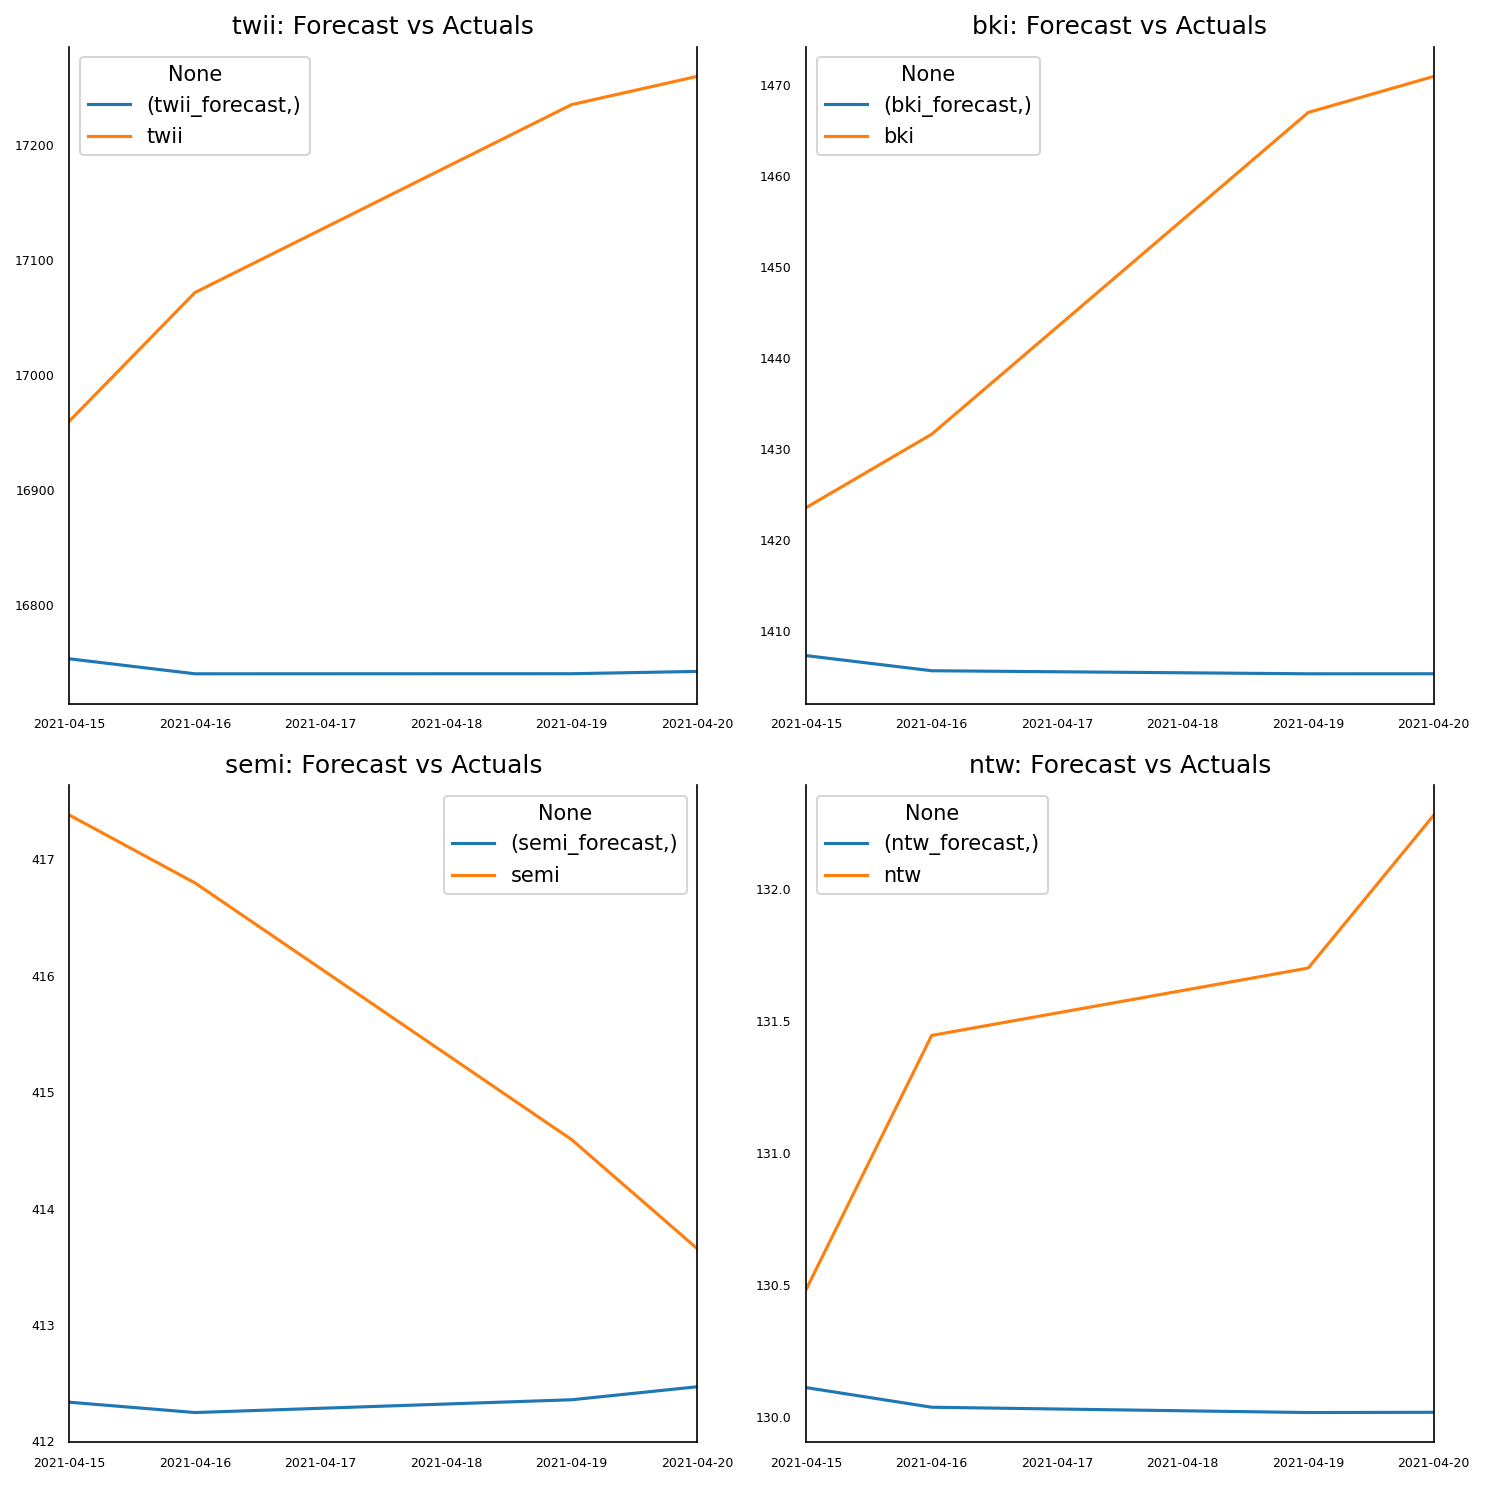

In [78]:
# Plot of Forecast vs Actuals

fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))

for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    rawData_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();